# Proyek Analisis Data: Nama dataset
- Nama: Muhammad I'tikafi Khoirul Haq
- Email: khoirulhaq23@gmail.com
- Id Dicoding: khoirulhaq23

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Tipe pembayaran apa yang menghasilkan revenue paling besar?
- pertanyaan 2 : Pada pukul berapakah frekuensi pembelian tertinggi dan terendah terjadi?

## Menyaipkan semua library yang dibuthkan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data

In [4]:
payment_df = pd.read_csv(r"data\order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
orders_df = pd.read_csv(r"data\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

#### Menilai Tabel payment_df

In [7]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
payment_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [9]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", payment_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai Tabel orders_df

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [16]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

### Cleaning Data

#### Pada Tabel payment_df tidak terdapat missing value dan duplikasi

In [17]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan Tabel orders_df

##### Missing Value

In [19]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

tidak terdapat missing value pada column order_status dan order_purchase_timestamp

##### Duplikasi

In [20]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore payment_df

In [21]:
payment_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19602,59b8a01e16359f7855eb1fc04091ca08,1,credit_card,6,80.89
38829,f6d9a259f1d0e93273707909a8e59fc6,1,credit_card,1,36.35
13829,5dc269b7c4dce1624653e914a1b739f5,1,credit_card,2,88.23
93788,f7499d7ef8d2ef5405b9f45b14223ee0,1,credit_card,1,37.80
9668,6553bc307b0ce8eded2609f0008ae2bd,2,credit_card,1,13.90
81623,fb77fb9a8fa0c429844158476ef8e5fa,1,credit_card,2,175.64
30281,0286e258217733541e80588e29c208c1,1,credit_card,5,81.63
90923,378895a1dc15cc571051e1b1c2e0c27d,1,credit_card,7,343.12
18279,708e9dad5dc7867bc3c61cee01f1f311,1,credit_card,2,208.74
71248,dde949eadfa9eaab6f60ca7dc63e7f51,1,credit_card,2,61.77


In [22]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [26]:
sum_payment_df = payment_df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)
sum_payment_df.head(15)

payment_type
credit_card    12542084.19
boleto          2869361.27
voucher          379436.87
debit_card       217989.79
not_defined           0.00
Name: payment_value, dtype: float64

### Explore orders_df

In [33]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9071,44bfe9e18e3f1f25344d2bf7243bf2f1,e07a6553644addb188f2aeaa5f273348,delivered,2018-02-23 18:53:29,2018-02-23 19:08:07,2018-02-26 23:27:05,2018-03-01 16:43:44,2018-03-09 00:00:00
13900,ff2af9c3633c70f37990bb59b0bed378,867fc3f851326da797d03c31e93717e9,delivered,2018-04-03 19:40:38,2018-04-03 19:50:18,2018-04-04 20:58:48,2018-04-05 21:58:55,2018-04-13 00:00:00
77496,420b64be551875169e87fb4a82d5fe13,43be7f68acb621076bde97c734132eb6,delivered,2018-04-02 09:25:04,2018-04-02 09:35:20,2018-04-04 00:12:15,2018-04-23 15:28:34,2018-05-04 00:00:00
21375,6f8b0c86311ec8c9e1558eff54965728,5bb2636017269333db235dbff660e595,delivered,2018-06-11 11:13:35,2018-06-12 05:16:00,2018-06-12 14:24:00,2018-06-19 17:10:34,2018-07-16 00:00:00
43184,6a56ad246a3e00f07e7f0e4f7fb3d519,432ccb202f9b881f60841007ff8bb896,delivered,2018-03-13 12:12:22,2018-03-13 12:30:29,2018-03-19 22:06:43,2018-04-09 20:34:48,2018-04-13 00:00:00


In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [35]:
# Konversi kolom order_purchase_timestamp ke tipe data datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

In [55]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [56]:
# Ekstrak jam dari timestamp
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour

# Hitung frekuensi pembelian di setiap jam
purchase_hour_counts = orders_df['purchase_hour'].value_counts().sort_index()

In [62]:
# Temukan jam dengan frekuensi tertinggi
jam_tertinggi = purchase_hour_counts.idxmax()
frekuensi_tertinggi = purchase_hour_counts.max()

# Temukan jam dengan frekuensi tertinggi
jam_terendah = purchase_hour_counts.idxmin()
frekuensi_terendah = purchase_hour_counts.min()

# Print jam dengan frekuensi tertinggi
print(f"Jam dengan frekuensi tertinggi: {jam_tertinggi}, Frekuensi: {frekuensi_tertinggi}")
print(f"Jam dengan frekuensi terndah: {jam_terendah}, Frekuensi: {frekuensi_terendah}")


Jam dengan frekuensi tertinggi: 16, Frekuensi: 6675
Jam dengan frekuensi terndah: 5, Frekuensi: 188


## Visualization & Explanatory Analysis

### Pertanyaan 1: Tipe pembayaran apa yang menghasilkan revenue paling besar?

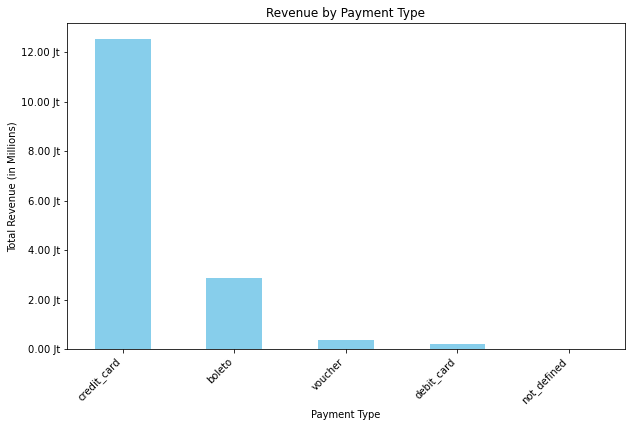

In [31]:
plt.figure(figsize=(10, 6))

# Fungsi untuk mengonversi nilai ke format dalam juta
def millions_formatter(x, pos):
    return f'{x/1e6:.2f} Jt'

# Menggunakan formatter untuk sumbu y
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

sum_payment_df.plot(kind='bar', color='skyblue')
plt.title('Revenue by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Revenue (in Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

Tipe pembayaran yang menghasilkan revenue paling besar adalah **credit_card**

### Pertanyaan 2: 

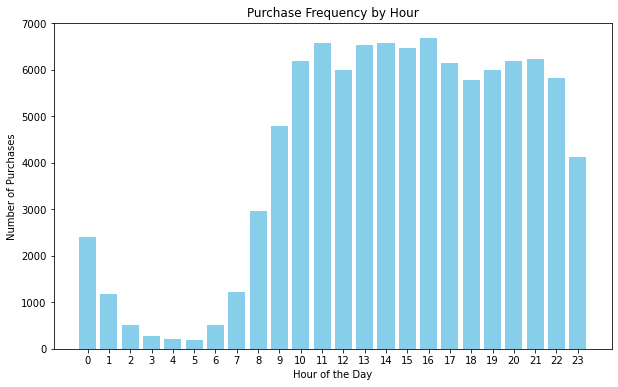

In [61]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(purchase_hour_counts.index, purchase_hour_counts.values, color='skyblue')
plt.title('Purchase Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.xticks(purchase_hour_counts.index)
plt.show()

Frekuensi pembelian terendah diperoleh di waktu dini hari hingga subuh dengan jam 5.00 pagi sebagai waktu dengan frekuensi pembelian terendah
Frekuensi pembelian tertinggi diperoleh di atas pukul 10.00 pagi hingga malam hari, dengan pukul 16.00 sore sebagai waktu dengan frekuensi pembelian tertinggi

## Conclusion

- Conclution pertanyaan 1:
    **credit_card** menjadi jenis pembayaran yang menghasilkan revenue tertinggi sebesar 12542084.19
- Conclution pertanyaan 2:
    Frekuensi pembelian terendah diperoleh di waktu dini hari hingga subuh dengan jam **5.00 pagi** sebagai waktu dengan frekuensi pembelian terendah
    Frekuensi pembelian tertinggi diperoleh di atas pukul 10.00 pagi hingga malam hari, dengan pukul **16.00 sore** sebagai waktu dengan frekuensi pembelian tertinggi